In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

pd.set_option("display.max_columns", None)

In [2]:
loc = 'data/'
file1 = 'ufc_fighters_stats.csv'
file2 = 'ufc_fights_stats.csv'

df1 = pd.read_csv(loc+file1)
df2 = pd.read_csv(loc+file2)

# <span style='color:green'> **[done]** </span> Exploratory Data Analysis

### <span style='color:green'> **[done]** </span> ufc_fighters_stats.csv exploration

In [3]:
df = df1.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Unnamed: 14'], axis=1)
df.tail(3)

,name,wins,losses,draws,Height:,Weight:,Reach:,STANCE:,DOB:,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
11195,Carlos Zevallos,3,NaN,-0,"6' 0""",205 lbs.,--,Orthodox,--,4.36,65%,2.28,68%,0.0,0%,100%,0.0
11196,Zach Zane,10,7.0,0,"5' 7""",145 lbs.,"69""",Southpaw,"Dec 14, 1989",0.87,56%,6.67,20%,0.0,0%,26%,0.0
11197,Roger Zapata,4,NaN,-0,"5' 11""",170 lbs.,--,Southpaw,"May 09, 1986",2.60,51%,2.13,36%,0.0,0%,81%,1.4


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

In [4]:
df.shape

(11198, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11198 entries, 0 to 11197
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11198 non-null  object 
 1   wins        11198 non-null  int64  
 2   losses      6457 non-null   float64
 3   draws       11198 non-null  object 
 4   Height:     11198 non-null  object 
 5   Weight:     11198 non-null  object 
 6   Reach:      11198 non-null  object 
 7   STANCE:     8860 non-null   object 
 8   DOB:        11198 non-null  object 
 9   SLpM:       11198 non-null  float64
 10  Str. Acc.:  11198 non-null  object 
 11  SApM:       11198 non-null  float64
 12  Str. Def:   11198 non-null  object 
 13  TD Avg.:    11198 non-null  float64
 14  TD Acc.:    11198 non-null  object 
 15  TD Def.:    11198 non-null  object 
 16  Sub. Avg.:  11198 non-null  float64
dtypes: float64(5), int64(1), object(11)
memory usage: 1.5+ MB


## renaming columns:

In [6]:
original_column_list = df.columns
lowercase_column_list = [column.lower() for column in original_column_list]

for column, new_column in zip(original_column_list,lowercase_column_list):
    if column.find(':') > -1:
        df = df.rename(columns = {column:new_column[0:len(new_column)-1]})
    else:
        df = df.rename(columns = {column:new_column})

df.head(1)    

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,"6' 1""",185 lbs.,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4


In [7]:
df = df.rename(columns = {'dob':'age'})
df.head(1)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,"6' 1""",185 lbs.,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4


### <span style='color:green'> **[done]** </span> height pre-processing

In [8]:
def get_height(item):
    
    '''return height in cm'''
    
    item = str(item)
    
    if item[0] == '-':
        return None
    else:
        return round(30.48 * float(item[0:item.find("'")]) + 2.54 * float(item[item.find("'")+1:item.find('"')]),2)

In [9]:
for i in range(0,len(df['height'])):
    df.loc[i,'height'] = get_height(df.loc[i,'height']) 
    
df.head()    

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,185 lbs.,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,155 lbs.,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,115 lbs.,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,145 lbs.,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,19,1.0,0,172.72,145 lbs.,"70""",Southpaw,"Jan 22, 1994",3.40,42%,2.25,67%,1.35,50%,76%,0.4


#### replacing null values with mean >

In [10]:
height_list = df['height'][df['height']!=None]
mean_height = np.round(np.mean(height_list),2)
df['height'] = df['height'].apply(lambda x: mean_height if x==None else x )
df.head()

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,185 lbs.,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,155 lbs.,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,115 lbs.,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,145 lbs.,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,19,1.0,0,172.72,145 lbs.,"70""",Southpaw,"Jan 22, 1994",3.40,42%,2.25,67%,1.35,50%,76%,0.4


### <span style='color:green'> **[done]** </span> weight 

In [11]:
def get_weight(item):
    
    '''return weight in kg'''
    
    item = str(item)
    
    if item[0] == '-':
        return None
    else:
        return 0.45 * float(item[0:item.find('lbs.')])

In [12]:
for i in range(0,len(df['weight'])):
    df.loc[i,'weight'] = get_weight(df.loc[i,'weight']) 
    
df.head()    

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,83.25,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,19,1.0,0,172.72,65.25,"70""",Southpaw,"Jan 22, 1994",3.40,42%,2.25,67%,1.35,50%,76%,0.4


#### replacing null values with mean >

In [13]:
mean_weight = np.round( np.mean(df['weight']) )
df['weight'] = df['weight'].apply(lambda x: mean_weight if x==None else x )
df.head()

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,83.25,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,19,1.0,0,172.72,65.25,"70""",Southpaw,"Jan 22, 1994",3.40,42%,2.25,67%,1.35,50%,76%,0.4


### <span style='color:green'> **[done]** </span> Reach

In [14]:
df.reach.unique()

array(['74"', '68"', '62"', '--', '70"', '71"', '72"', '75"', '73"',
       '80"', '66"', '77"', '76"', '63"', '69"', '78"', '79"', '67"',
       '65"', '64"', '81"', '61"', '59"', '60"', '84"', '82"', '58"',
       '83"'], dtype=object)

In [15]:
def get_reach(item):
    
    '''return reach in cm'''
    
    item = str(item)
    
    if item[0] == '-':
        return None
    else:
        return 2.54 * float(item[0:item.find('"')])

In [16]:
for i in range(0,len(df['reach'])):
    df.loc[i,'reach'] = get_reach(df.loc[i,'reach']) 
    
df.head()   

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,83.25,187.96,Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,172.72,Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,157.48,Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,None,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,19,1.0,0,172.72,65.25,177.8,Southpaw,"Jan 22, 1994",3.40,42%,2.25,67%,1.35,50%,76%,0.4


#### replacing null values with "standard reach" ( =mean(reach/height)*height ) >

<AxesSubplot:xlabel='height', ylabel='reach'>

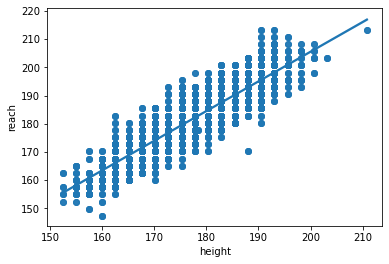

In [17]:
df['reach'] = pd.to_numeric(df.reach)
sns.regplot(x=df.height, y=df.reach)

In [18]:
def get_std_reach(item, height, reach_list, height_list):
    '''return "standard reach" ( =mean(reach/height)*height )'''
    return round(height*np.mean(reach_list/height_list),2)

In [19]:
null_indexs = df[df.reach.isna()].index

for i in null_indexs:
    df.loc[i, 'reach'] = get_std_reach(df.loc[i, 'reach'],df.loc[i,'height'], df['reach'], df['height']) 
    
print('Null changed: ' + str(len(null_indexs)))
df.head(5)   

Null changed: 5476


,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,83.25,187.96,Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,172.72,Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,157.48,Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,174.36,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,19,1.0,0,172.72,65.25,177.80,Southpaw,"Jan 22, 1994",3.40,42%,2.25,67%,1.35,50%,76%,0.4


### <span style='color:green'> **[done]** </span> stance

In [20]:
df.stance.unique()

array(['Switch', 'Orthodox', nan, 'Southpaw', 'Open Stance', 'Sideways'],
      dtype=object)

In [21]:
null_indexs = df[df.stance.isna()].index

for i in null_indexs:
    df.loc[i, 'stance'] = 'Orthodox' 
    
print('Null changed: ' + str(len(null_indexs)))
print(df.stance.unique())
df.head(5)   

Null changed: 2338
['Switch' 'Orthodox' 'Southpaw' 'Open Stance' 'Sideways']


,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,83.25,187.96,Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,172.72,Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,157.48,Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,174.36,Orthodox,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,19,1.0,0,172.72,65.25,177.80,Southpaw,"Jan 22, 1994",3.40,42%,2.25,67%,1.35,50%,76%,0.4


### <span style='color:green'> **[done]** </span> Age

In [22]:
df.age.unique()

array(['Nov 15, 1979', 'Nov 14, 1990', 'Jun 08, 1995', ...,
       'Jul 25, 1978', 'Dec 14, 1989', 'May 09, 1986'], dtype=object)

In [23]:
def get_age(item):
    
    '''return age (instead of date of birth)'''
    
    from datetime import date,timedelta
    
    item = str(item)
    current_date = date.today().year
    
    if item[0] == '-':
        return None
    else:
        return (current_date - int(item[item.find(',')+1:]))

In [24]:
for i in range(0,len(df['age'])):
    
    if df.loc[i, 'age'] != None:
        df.loc[i, 'age'] = get_age(df.loc[i, 'age']) 
    
df.age.unique()  

array([44, 33, 28, 35, 29, 50, 30, 51, 45, 47, 39, 40, 58, 34, 49, 36,
       None, 32, 37, 46, 56, 53, 27, 38, 41, 31, 42, 43, 48, 52, 26, 23,
       55, 22, 24, 25, 54, 57, 59, 60, 69, 65, 64, 21, 62, 19, 61, 80, 63,
       67], dtype=object)

#### replacing null with standard age >

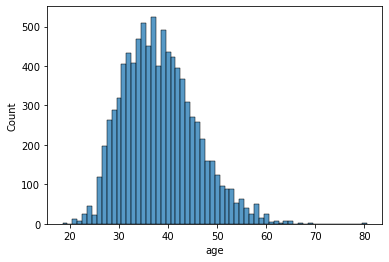

In [25]:
ax = sns.histplot(x=df["age"])

In [26]:
def get_std_age(item, age_list):
    
    '''return standrd age per weight class'''
    
    return round(np.mean(age_list),2)

In [27]:
for i in range(0,len(df['age'])):
    
    if df.loc[i, 'age'] == None:
        df.loc[i, 'age'] = get_std_age(df.loc[i, 'age'], df['age']) 
    
df.age.unique()  

array([44, 33, 28, 35, 29, 50, 30, 51, 45, 47, 39, 40, 58, 34, 49, 36,
       38.31, 32, 37, 46, 56, 53, 27, 38, 41, 31, 42, 43, 48, 52, 26, 23,
       55, 22, 24, 25, 54, 57, 59, 60, 69, 65, 64, 21, 62, 19, 61, 80, 63,
       67], dtype=object)

### <span style='color:green'> **[done]** </span> statistics % pre-processing

In [28]:
for i in range(0,len(df)):
    
    item = str(df.loc[i,'str. acc.'])
    df.loc[i,'str. acc.'] = float(item[0:item.find('%')])/100
    
    item = str(df.loc[i,'str. def'])
    df.loc[i,'str. def'] = float(item[0:item.find('%')])/100
    
    item = str(df.loc[i,'td acc.'])
    df.loc[i,'td acc.'] = float(item[0:item.find('%')])/100
    
    item = str(df.loc[i,'td def.'])
    df.loc[i,'td def.'] = float(item[0:item.find('%')])/100
    
df.head()

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,83.25,187.96,Switch,44,2.21,0.5,2.72,0.46,2.83,0.5,0.57,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,172.72,Orthodox,33,2.46,0.5,4.14,0.58,0.41,0.25,0.6,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,157.48,Orthodox,28,3.67,0.31,6.87,0.57,1.00,0.25,0.0,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,174.36,Orthodox,35,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4,Arnold Allen,19,1.0,0,172.72,65.25,177.80,Southpaw,29,3.40,0.42,2.25,0.67,1.35,0.5,0.76,0.4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11198 entries, 0 to 11197
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11198 non-null  object 
 1   wins       11198 non-null  int64  
 2   losses     6457 non-null   float64
 3   draws      11198 non-null  object 
 4   height     11198 non-null  float64
 5   weight     11198 non-null  float64
 6   reach      11198 non-null  float64
 7   stance     11198 non-null  object 
 8   age        11198 non-null  object 
 9   slpm       11198 non-null  float64
 10  str. acc.  11198 non-null  object 
 11  sapm       11198 non-null  float64
 12  str. def   11198 non-null  object 
 13  td avg.    11198 non-null  float64
 14  td acc.    11198 non-null  object 
 15  td def.    11198 non-null  object 
 16  sub. avg.  11198 non-null  float64
dtypes: float64(8), int64(1), object(8)
memory usage: 1.5+ MB


### <span style='color:green'> **[done]** </span> losses pre-processing

In [30]:
i = 0
for item in df['losses']:
    if str(item) == 'nan':
        df.loc[i,'losses'] = int(0)
    else:    
        df.loc[i,'losses'] = int(df.loc[i,'losses'])
    i += 1
    
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11198 entries, 0 to 11197
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11198 non-null  object 
 1   wins       11198 non-null  int64  
 2   losses     11198 non-null  float64
 3   draws      11198 non-null  object 
 4   height     11198 non-null  float64
 5   weight     11198 non-null  float64
 6   reach      11198 non-null  float64
 7   stance     11198 non-null  object 
 8   age        11198 non-null  object 
 9   slpm       11198 non-null  float64
 10  str. acc.  11198 non-null  object 
 11  sapm       11198 non-null  float64
 12  str. def   11198 non-null  object 
 13  td avg.    11198 non-null  float64
 14  td acc.    11198 non-null  object 
 15  td def.    11198 non-null  object 
 16  sub. avg.  11198 non-null  float64
dtypes: float64(8), int64(1), object(8)
memory usage: 1.5+ MB


In [31]:
stat_df = df

## <span style='color:green'> **[done]** </span> ufc_fights_stats.csv exploration

In [32]:
df = df2.drop(['Unnamed: 0'], axis = 1)
df.head()

,W/L,Fighter,Kd,Str,Td,Sub,Weight class,Method,Round,Time,date
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,"September 03, 2022"
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,"September 03, 2022"
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,"September 03, 2022"
3,win,Roman Kopylov:Alessio Di Chirico,1:0,59:39,0:0,0:0,Middleweight,KO/TKO:Punches,3,1:09,"September 03, 2022"
4,win,William Gomis:Jarno Errens,0:0,32:20,3:0,0:1,Featherweight,U-DEC:,3,5:00,"September 03, 2022"


In [33]:
original_column_list = df.columns
lowercase_column_list = [column.lower() for column in original_column_list]

for column, new_column in zip(original_column_list,lowercase_column_list):
    df = df.rename(columns = {column:new_column})

df.head(1)    

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,"September 03, 2022"


In [34]:
df.shape

(6937, 11)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937 entries, 0 to 6936
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   w/l           6937 non-null   object
 1   fighter       6937 non-null   object
 2   kd            6937 non-null   object
 3   str           6937 non-null   object
 4   td            6937 non-null   object
 5   sub           6937 non-null   object
 6   weight class  6937 non-null   object
 7   method        6937 non-null   object
 8   round         6937 non-null   int64 
 9   time          6937 non-null   object
 10  date          6937 non-null   object
dtypes: int64(1), object(10)
memory usage: 596.3+ KB


### <span style='color:green'> **[done]** </span> feature date column

In [36]:
df.date = pd.to_datetime(df.date)
df.head(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03


### <span style='color:green'> **[done]** </span> feature Win/Lose fighter column

In [37]:
df['w_fighter'] = None
df['l_fighter'] = None

i = 0
for item in df['fighter']:
    df.loc[i,'w_fighter'] = item[0:item.find(':')]
    df.loc[i,'l_fighter'] = item[item.find(':')+1:]
    i += 1
    
df.head(3)    

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley


#### [ done ] drop nc/draw rows >

In [38]:
df = (df[df['w/l'] == 'win']).reset_index(drop=True)
df.shape

(6815, 13)

### <span style='color:green'> **[done]** </span> feature stats columns

In [39]:
column_list = ['kd','str','td','sub']

# creating new columns
for column in column_list:
    df['w_' + column] = None
    df['l_' + column] = None

# adding data:    
for i in range(0,len(df)):
    for column in column_list:
        item = df.loc[i, column]
        df.loc[i, 'w_' + column] = item[0:item.find(':')]
        df.loc[i, 'l_' + column] = item[item.find(':')+1:]

df.head(3)        

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0


### <span style='color:green'> **[done]** </span> feature Win % column
* <span style='color:green'> **[done]** </span> get_win_perc(name, df)

In [40]:
def get_win_perc(name, date, df):
    
    '''return current career winning %'''
    
    wins = len(df[(df['w_fighter'] == name) & (df.date < date)])
    losses = len(df[(df['l_fighter'] == name) & (df.date < date)])
    
    if wins == 0:
        return 0
    return wins/(wins+losses)

In [41]:
df['w_win_perc'] = None
df['l_win_perc'] = None

i = 0
for w_fighter, l_fighter, date in zip(df['w_fighter'], df['l_fighter'], df['date']):
    print('%d%% Completed' %(round((i/len(df))*100,2)), end ='\r')
    df.loc[i, 'w_win_perc'] = round(get_win_perc(w_fighter, date, df),2)
    df.loc[i, 'l_win_perc'] = round(get_win_perc(l_fighter, date, df),2)    
    i += 1
    
print('\nDone!') 
df.head(3)

99% Completed
Done!


,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71


### <span style='color:green'> **[done]** </span> feature Win/Lose streak column

* <span style='color:green'> **[done]** </span> get_win_streak(name, df) 
* <span style='color:green'> **[done]** </span> get_lose_streak(name, df)
* <span style='color:green'> **[done]** </span> get_streak_data_frame(name, df)
    * <span style='color:green'> **[done]** </span> get_lose_streak_data_frame(name, df)
    * <span style='color:green'> **[done]** </span> get_win_streak_data_frame(name, df) 

In [42]:
def get_lose_streak_data_frame(name, date, df):
    
    '''return losses data frame of: sequence(from last to first), result(win/lose) & opponent '''
    
    lose_streak = pd.DataFrame({
        'result': np.array('lose'),
        'date': pd.to_datetime(np.array(df.date[df.l_fighter == name])),
        'opponent': np.array(df['w_fighter'][df.l_fighter == name])
    })
    
    return lose_streak[lose_streak.date < date]

In [43]:
def get_win_streak_data_frame(name, date, df):
    
    '''return wins data frame of: sequence(from last to first), result(win/lose) & opponent '''
    
    win_streak = pd.DataFrame({
        'result': np.array('win'),
        'date': pd.to_datetime(np.array(df.date[df.w_fighter == name])),
        'opponent': np.array(df['l_fighter'][df.w_fighter == name])
    })
    
    return win_streak[win_streak.date < date]

In [44]:
def get_streak_data_frame(name, date, df):
    
    '''return losses & winns data frame sorted by date'''
    
    wins_df = get_win_streak_data_frame(name, date, df)
    losses_df = get_lose_streak_data_frame(name, date, df)
    
    return (pd.concat([wins_df, losses_df])).sort_values(by='date', ascending=False)

In [45]:
def get_win_streak(name, date, df):
    
    '''return int of fighter recent win streak'''
    
    streak = get_streak_data_frame(name, date, df)
    
    count = 0
    for result in streak['result']:
        if result == 'lose':
            return count
        count += 1
    
    return count

In [46]:
def get_lose_streak(name, date, df):
    
    '''return int of fighter recent losses streak'''
    
    streak = get_streak_data_frame(name, date, df)
    
    count = 0
    for result in streak['result']:
        if result == 'win':
            return count
        count += 1
    
    return count

In [47]:
df['w_win_strk'] = None
df['l_win_strk'] = None
df['w_lose_strk'] = None
df['l_lose_strk'] = None

i = 0
for w_fighter, l_fighter in zip(df['w_fighter'], df['l_fighter']):
    print('%d%% Completed' %(round((i/len(df))*100,2)), end ='\r')
    df.loc[i, 'w_win_strk'] = get_win_streak(df.loc[i,'w_fighter'], df.loc[i,'date'], df)
    df.loc[i, 'l_win_strk'] = get_win_streak(df.loc[i,'l_fighter'], df.loc[i,'date'],df)
    df.loc[i, 'w_lose_strk'] = get_lose_streak(df.loc[i,'w_fighter'], df.loc[i,'date'],df)
    df.loc[i, 'l_lose_strk'] = get_lose_streak(df.loc[i,'l_fighter'], df.loc[i,'date'],df)
    i += 1
    
print('\nDone!') 
df.head(3)

99% Completed
Done!


,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73,0,5,1,0
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0


### <span style='color:green'> **[done]** </span> feature total fight time (in minutes)

In [48]:
df['ttime'] = None

for rnd, time, i in zip(df['round'], df['time'], range(0,len(df))):
    rnd = int(rnd)
    minutes = int(time[0:time.find(':')])
    seconds = int(time[time.find(':')+1:])
    ttime = ((rnd - 1)*5*60 + minutes*60 + seconds)/60 
    df.loc[i,'ttime'] = round(ttime, 3)
    
df.head(3)    

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73,0,5,1,0,14.383
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.0
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0,15.0


In [49]:
main_df = df

# <span style='color:green'> **[done]** </span> Merge data frames
extracting data from fighters.csv(=stats_df) and add it to fights.csv(=main_df)

### Functions setup:
* <span style='color:green'> **[done]** </span> get_stat(name, data, stat) 
* <span style='color:green'> **[done]** </span> set_fighter_stats(name, data, stat)

In [50]:
stat_df.head()

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
0,Dylan Andrews,18,7.0,0,185.42,83.25,187.96,Switch,44,2.21,0.5,2.72,0.46,2.83,0.5,0.57,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,172.72,Orthodox,33,2.46,0.5,4.14,0.58,0.41,0.25,0.6,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,157.48,Orthodox,28,3.67,0.31,6.87,0.57,1.00,0.25,0.0,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,174.36,Orthodox,35,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4,Arnold Allen,19,1.0,0,172.72,65.25,177.80,Southpaw,29,3.40,0.42,2.25,0.67,1.35,0.5,0.76,0.4


In [51]:
df = main_df
main_df.head(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73,0,5,1,0,14.383
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.0
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0,15.0


In [103]:
def get_fighter_stats(name, data ):
    '''return fighters statistics from stat_df'''
    
    stat_list = data.columns[1:]
    row = (data[stat_list][data.name==name]).reset_index(drop=True)
    
    if len(row) < 1:
        return np.array(len(stat_list)*[None])
    else:
        return np.array(row.loc[0])

In [53]:
def add_columns(data, column_list):
    
    '''add new columns to data '''
    
    for column in column_list:
        data[column] = None
    
    return data

### <span style='color:green'> **[done]** </span> add new empty columns:

In [54]:
original_columns_list = main_df.columns

w_column_list = ['w_' + column for column in stat_df.columns[1:]]
l_column_list = ['l_' + column for column in stat_df.columns[1:]]
new_column_list = w_column_list + l_column_list

for column in new_column_list:
    main_df[column] = None

main_df.columns    

Index(['w/l', 'fighter', 'kd', 'str', 'td', 'sub', 'weight class', 'method',
       'round', 'time', 'date', 'w_fighter', 'l_fighter', 'w_kd', 'l_kd',
       'w_str', 'l_str', 'w_td', 'l_td', 'w_sub', 'l_sub', 'w_win_perc',
       'l_win_perc', 'w_win_strk', 'l_win_strk', 'w_lose_strk', 'l_lose_strk',
       'ttime', 'w_wins', 'w_losses', 'w_draws', 'w_height', 'w_weight',
       'w_reach', 'w_stance', 'w_age', 'w_slpm', 'w_str. acc.', 'w_sapm',
       'w_str. def', 'w_td avg.', 'w_td acc.', 'w_td def.', 'w_sub. avg.',
       'l_wins', 'l_losses', 'l_draws', 'l_height', 'l_weight', 'l_reach',
       'l_stance', 'l_age', 'l_slpm', 'l_str. acc.', 'l_sapm', 'l_str. def',
       'l_td avg.', 'l_td acc.', 'l_td def.', 'l_sub. avg.'],
      dtype='object')

### <span style='color:green'> **[done]** </span> add data to new stats columns:

In [104]:

for index in range(0,len(main_df)):
    print('%d%% Completed' %(round((index/len(main_df))*100,2)), end ='\r')
    w_fighter = main_df.loc[index, 'w_fighter']
    l_fighter = main_df.loc[index, 'l_fighter']
    
    new_row = main_df.loc[index,original_columns_list]
    new_row = np.append(new_row, [get_fighter_stats(name=w_fighter, data=stat_df )])
    new_row = np.append(new_row, [get_fighter_stats(name=l_fighter, data=stat_df )])
    main_df.iloc[index] = new_row

print('\nDone!')    
main_df.tail(3)

99% Completed
Done!


,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
6812,win,Aleksandra Albu:Kailin Curran,0:0,82:86,5:1,0:0,Women's Strawweight,U-DEC:,3,5:00,2017-07-29,Aleksandra Albu,Kailin Curran,0,0,82,86,5,1,0,0,1.0,0.2,1,0,0,2,15.0,3,0.0,-0,157.48,51.75,160.02,Orthodox,33,4.83,0.47,5.56,0.38,2.27,0.5,0.77,0.4,4,0.0,-0,162.56,51.75,165.1,Orthodox,32,3.89,0.43,4.75,0.53,2.0,0.57,0.61,0.6
6813,win,Jarred Brooks:Eric Shelton,0:0,27:31,5:1,1:1,Flyweight,S-DEC:,3,5:00,2017-07-29,Jarred Brooks,Eric Shelton,0,0,27,31,5,1,1,1,0,0,0,0,0,1,15.0,13,2.0,0,160.02,56.25,157.48,Switch,30,2.12,0.46,1.66,0.62,4.54,0.57,0.69,0.6,12,6.0,0,167.64,56.25,172.72,Orthodox,32,2.57,0.42,1.88,0.63,2.83,0.51,0.46,0.2
6814,win,Drew Dober:Joshua Burkman,1:0,15:11,0:0,0:0,Lightweight,KO/TKO:Punch,1,3:04,2017-07-29,Drew Dober,Joshua Burkman,1,0,15,11,0,0,0,0,0.43,0.38,0,0,1,3,3.067,25,1.0,-0,172.72,69.75,177.8,Southpaw,35,4.47,0.4,4.16,0.51,0.75,0.17,0.54,0.1,28,1.0,-0,177.8,76.5,182.88,Orthodox,43,2.69,0.43,3.13,0.51,2.53,0.36,0.72,0.3


### <span style='color:green'> **[done]** </span> filter Str columns (where there is no striking details):

In [108]:
df = df[~((df['l_str']=='--')|(df['w_str']=='--'))]
df.head(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73,0,5,1,0,14.383,11,1.0,0,193.04,110.25,205.74,Orthodox,33,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15,4.0,0,187.96,118.8,190.5,Southpaw,30,4.12,0.5,4.24,0.45,0.0,0.0,0.52,0.0
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.0,25,6.0,0,182.88,83.25,185.42,Orthodox,33,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18,6.0,1,182.88,83.25,187.96,Southpaw,30,4.2,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0,15.0,12,3.0,0,190.5,83.25,190.5,Orthodox,28,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15,5.0,0,177.8,83.25,193.04,Southpaw,29,3.61,0.32,3.42,0.54,1.35,0.3,0.66,0.0


In [109]:
df.to_csv('data/ufc_data.csv')